In [1]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import numpy as np
import cv2

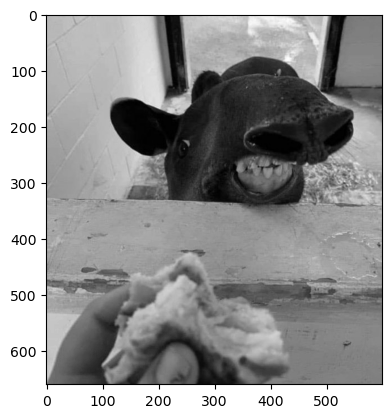

In [2]:
img = cv2.imread('food.jpg', cv2.IMREAD_GRAYSCALE) 

plt.imshow(img, cmap="grey")

# General Information

Please use the following picture for all tasks in this notebook. You are allowed to use OpenCV to solve the tasks.

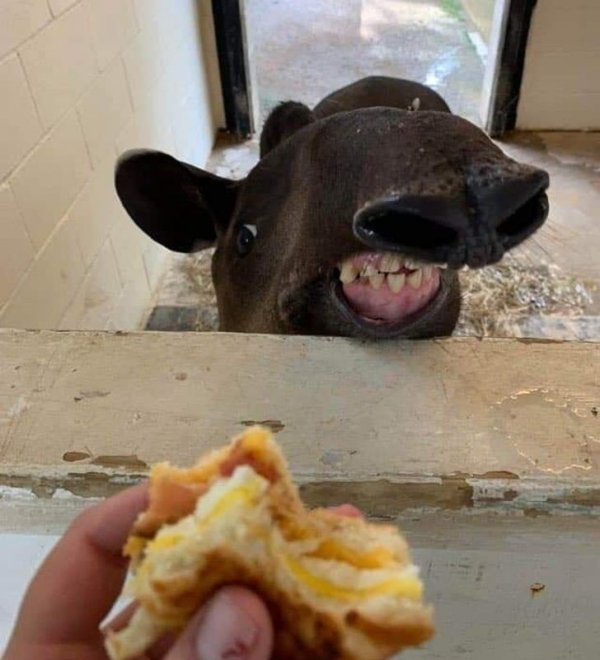

# Load the picture in greyscale

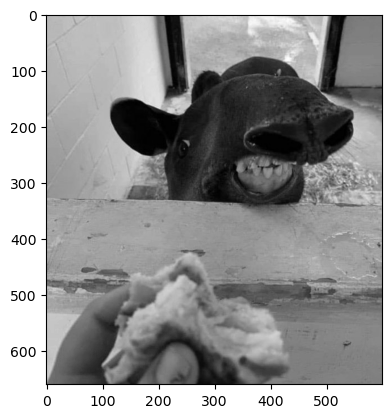

In [3]:
plt.imshow(img, cmap="grey")

# Blurring


## Use <code>numpy</code> to create a Box Blur filter with different dimensions (5,11,21) and apply it to the test image
**Hint**: Take care for the correct normalization constant

In [4]:
def conv2d(a, f):
    s = f.shape + tuple(np.subtract(a.shape, f.shape) + 1)
    strd = np.lib.stride_tricks.as_strided
    subM = strd(a, shape = s, strides = a.strides * 2)
    return np.einsum('ij,ijkl->kl', f, subM)

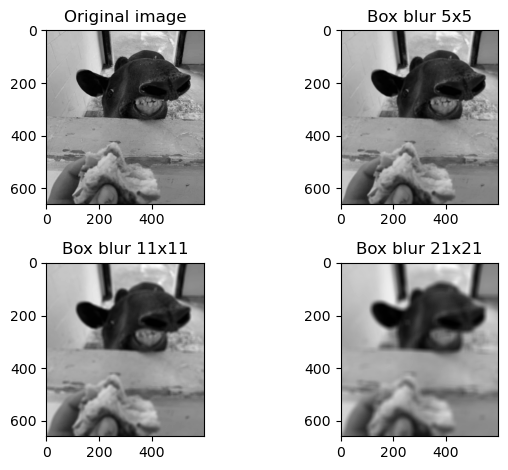

In [5]:
def get_box_blur(size=5):
    kernel = np.ones((size, size))
    return kernel / np.sum(kernel)

sizes = [5, 11, 21]

plt.subplot((len(sizes) + 1) // 2, 2, 1)
plt.imshow(img, cmap="grey")
plt.title("Original image")

for i, box_size in enumerate(sizes):
    plt.subplot((len(sizes) + 1) // 2, 2,  i + 2)
    box_blur_kernel = get_box_blur(box_size)
    blurred = cv2.filter2D(img, -1, box_blur_kernel)

    plt.imshow(blurred, cmap="grey")
    plt.title(f"Box blur {box_size}x{box_size}", )
plt.tight_layout()

## Use <code>cv2</code> to create a Gaussian Blur with different kernel sizes (5,11,21) and apply it to the image. Study the effect of the kernel size and compare it to the Box Blur

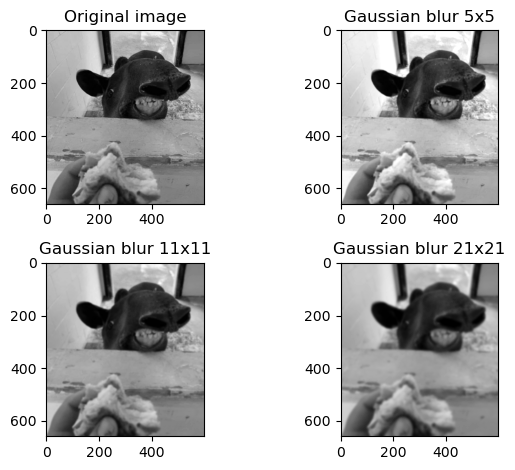

In [6]:
def get_gaussian_blur(size=5):
    middle = size//2
    kernel_base = np.zeros((size, size))
    kernel_base[middle, middle] = 1

    kernel = cv2.GaussianBlur(kernel_base, (size, size), 0)
    return kernel



sizes = [5, 11, 21]

plt.subplot((len(sizes) + 1) // 2, 2, 1)
plt.imshow(img, cmap="grey")
plt.title("Original image")

for i, box_size in enumerate(sizes):
    plt.subplot((len(sizes) + 1) // 2, 2,  i + 2)
    box_blur_kernel = get_gaussian_blur(box_size)
    blurred = cv2.filter2D(img, -1, box_blur_kernel)

    plt.imshow(blurred, cmap="grey")
    plt.title(f"Gaussian blur {box_size}x{box_size}", )
plt.tight_layout()

# Sharpen

## Use <code>numpy</code> to define a kernel that can sharpen your image and apply it

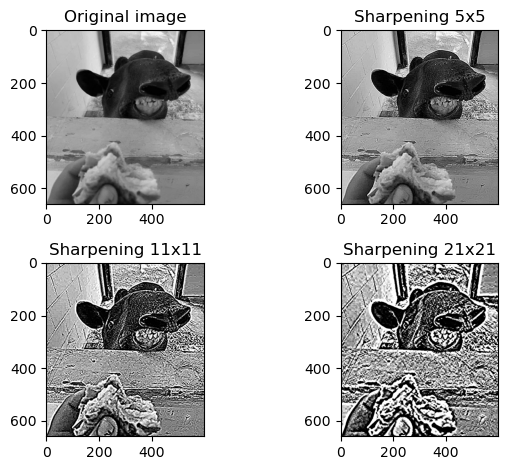

In [7]:
def get_sharpening_kernel(size=5):
    middle = size // 2
    kernel = np.zeros((size, size))
    kernel[middle, :] = -1
    kernel[:, middle] = -1
    kernel[middle, middle] = -np.sum(kernel)
    return kernel


sizes = [5, 11, 21]

plt.subplot((len(sizes) + 1) // 2, 2, 1)
plt.imshow(img, cmap="grey")
plt.title("Original image")


for i, box_size in enumerate(sizes):
    plt.subplot((len(sizes) + 1) // 2, 2,  i + 2)
    box_blur_kernel = get_sharpening_kernel(box_size)
    blurred = cv2.filter2D(img, -1, box_blur_kernel)

    plt.imshow(blurred, cmap="grey")
    plt.title(f"Sharpening {box_size}x{box_size}", )
plt.tight_layout()

# Edge Detection

## Define a kernel that can detect edges and apply it to the image. Visualize the resulting image

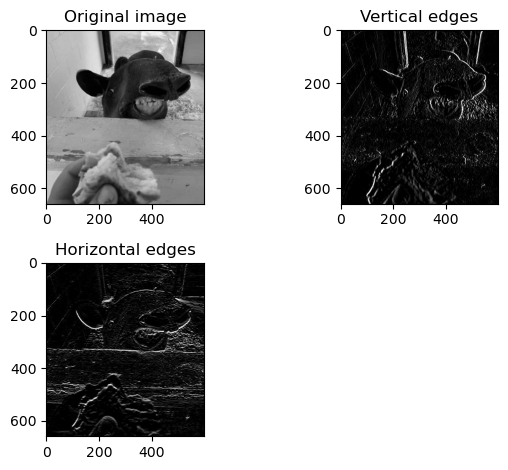

In [8]:
vertical_edge_kernel = np.array(
    [[0, -1, 1],
    [0, -1, 1],
    [0, -1, 1]]
) * 4
horizontal_edge_kernel = np.transpose(vertical_edge_kernel)

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="grey")
plt.title("Original image")


plt.subplot(2, 2, 2)
vertical_edges = cv2.filter2D(img, -1, vertical_edge_kernel)
plt.imshow(vertical_edges, cmap="grey")
plt.title("Vertical edges")



plt.subplot(2, 2, 3)
horizontal_edges = cv2.filter2D(img, -1, horizontal_edge_kernel)
plt.imshow(horizontal_edges, cmap="grey")
plt.title("Horizontal edges")

plt.tight_layout()

## Use a sobel filter (see in lecture slides) and apply it to the image in x and in y direction.

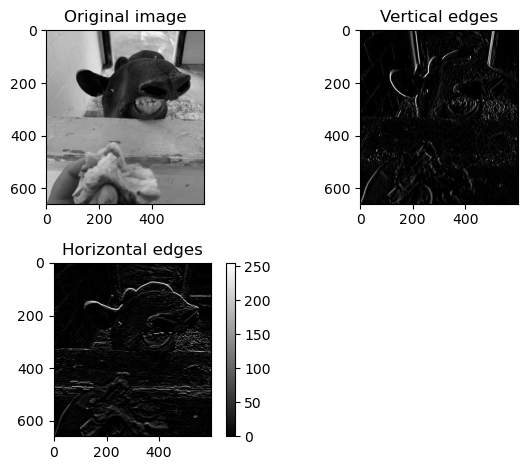

In [9]:
## H_y
vertical_edge_sobel = np.array(
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
)

## H_x
horizontal_edge_sobel = np.transpose(vertical_edge_sobel)

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="grey")
plt.title("Original image")


plt.subplot(2, 2, 2)
vertical_edges_sobel = cv2.filter2D(img, -1, vertical_edge_sobel)
plt.imshow(vertical_edges_sobel, cmap="grey")
plt.title("Vertical edges")



plt.subplot(2, 2, 3)
horizontal_edges_sobel = cv2.filter2D(img, -1, horizontal_edge_sobel)
plt.imshow(horizontal_edges_sobel, cmap="grey")
plt.title("Horizontal edges")
plt.colorbar()
plt.tight_layout()

## Calculate the magnitude and orientation and visualize it
$ H_{magnitude} = \sqrt{H_x^2 + H_y^2} $

$\theta = arctan(H_x,H_y)$

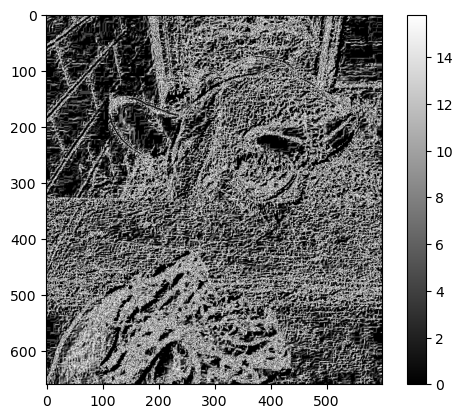

In [10]:
# Hint: to visualize orientation, use HSV color space!

h_mag = np.sqrt(horizontal_edges_sobel ** 2 + vertical_edges_sobel ** 2)

plt.imshow(h_mag, cmap="grey")
plt.colorbar()

In [11]:
#TODO: plot in HSV
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv

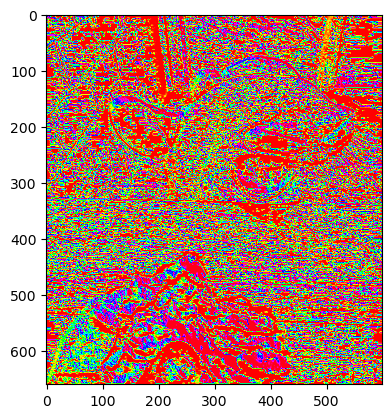

In [12]:
theta = np.arctan2(horizontal_edges_sobel, vertical_edges_sobel)
plt.imshow(theta, cmap="hsv")